## 🎓 Ödev: Pokémon Efsanevi Sınıflandırması (ML Pipeline Projesi)

### 🔍 Amaç:

Bir Pokémon’un istatistiksel özellikleri ve tür bilgilerine göre **efsanevi (legendary)** olup olmadığını sınıflandıracak çeşitli makine öğrenmesi modelleri geliştirin, karşılaştırın ve en iyi modeli optimize edin.

---

## 🔧 1. Kurulum ve Kütüphaneler

* Gerekli Python kütüphanelerini içe aktarın: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, XGBoost, LightGBM, CatBoost.

---

## 📥 2. Veri Yükleme ve İnceleme

*Veri setini yükleyin:


```

url = "https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv"
pokemon_df = pd.read_csv(url)
```


* Veri setinin genel yapısını (`head()`, `info()`, `describe()`) kullanarak keşfedin.
* Hedef değişkeniniz: `Legendary` sütunu.

---

## 🔍 3. Veri Ön İşleme

* Eksik verileri kontrol edin ve gerektiğinde uygun doldurma stratejileri uygulayın.
* Kategorik değişkenleri `LabelEncoder` veya `OneHotEncoder` ile sayısal forma çevirin.
* Aşağıdaki yeni değişkenleri oluşturmayı düşünün:

  * `Total` (istatistiklerin toplamı)
  * `Is_Mono_Type`: Pokémon tek tipe mi sahip?
  * `Attack_Defense_Ratio`: Saldırı / Savunma oranı
* Gereksiz veya çok benzer değişkenleri kaldırın.
* Hedef değişken (`Legendary`) için `LabelEncoder` uygulayın (True → 1, False → 0)

---

## 🔍 4. Veri Setinin Bölünmesi

* Özellikler (X) ve hedef değişken (y) olarak ayırın.
* Eğitim ve test setlerine %80-%20 oranında ayırın.

---

## 🧠 5. Makine Öğrenmesi Modelleri

Aşağıdaki modelleri kullanarak eğitim ve tahmin yapın:

* Random Forest
* Support Vector Machine (SVM) (StandardScaler ile Pipeline içinde)
* k-NN (StandardScaler ile Pipeline içinde)
* XGBoost
* LightGBM
* CatBoost

Her model için:

* Eğitimi gerçekleştirin
* Test seti üzerinde tahmin yapın
* Doğruluk, precision, recall, F1-score metriklerini raporlayın
* Confusion matrix'i görselleştirin

---

## 🏆 6. En Başarılı Modelin Belirlenmesi

* Tüm modellerin doğruluk skorlarını karşılaştırın.
* En iyi performansı gösteren modeli belirleyin.

---

## 🔧 7. Hiperparametre Optimizasyonu (GridSearchCV)

* En iyi modeli seçtikten sonra GridSearchCV kullanarak hiperparametre optimizasyonu yapın.
* Uygun parametre grid’ini tanımlayın.
* `cv=5` ile çapraz doğrulama gerçekleştirin.
* En iyi skor ve parametreleri yazdırın.
* Optimize edilmiş modelle test setinde tekrar tahmin yapın ve metrikleri karşılaştırın.

---

## 📊 8. Sonuçların Karşılaştırılması ve Raporlama

* Tüm modellerin skorlarını çubuk grafikle görselleştirin.
* Hangi model neden daha iyi performans gösterdi? Yorumlayın.
* Özellik önem skorlarını çıkarın (varsa) ve en belirleyici değişkenleri analiz edin.

---

## 🔁 (İsteğe Bağlı) Bonus Görevler

* SMOTE veya benzeri yöntemlerle sınıf dengesizliğini düzeltin ve etkiyi gözlemleyin.
* Modelin tahminlerini `Type1` bazında analiz edin: En çok hata yapılan tür hangisi?

---

## 📁 Teslim Formatı

* Adım adım işlenmiş ve yorumlanmış bir `.ipynb` notebook dosyası.
* Her adımın başında markdown hücreleriyle kısa açıklamalar.
* Görselleştirmeler ve çıktılar eksiksiz olmalı.




In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

!pip install xgboost lightgbm catboost
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [ ]:
import pandas as pd

# Yüklediğim dosyadan veri çekmek için.
df = pd.read_csv('Pokemon.csv')

pokemon_df = df.copy()

In [ ]:
# Veri setinin genel yapısını (`head()`, `info()`, `describe()`) kullanarak keşfedin.
# Hedef değişkeniniz: `Legendary` sütunu.

print(pokemon_df.head())
print(pokemon_df.info())
print(pokemon_df.describe())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        8

In [ ]:
# Kategorik değişkenleri belirleme

# Obje veri tipine sahip sütunlar genellikle kategorik değişkenlerdir.
categorical_cols = pokemon_df.select_dtypes(include='object').columns

print("\nKategorik Değişkenler:")
print(categorical_cols)

# Kategorik değişkenlerin benzersiz değerlerini kontrol etme (çok fazla seviyesi olanları belirlemek için)
for col in categorical_cols:
  print(f"\n'{col}' Sütununun Benzersiz Değerleri:")
  print(pokemon_df[col].unique())
  print(f"Benzersiz Değer Sayısı: {pokemon_df[col].nunique()}")



Kategorik Değişkenler:
Index(['Name', 'Type 1', 'Type 2'], dtype='object')

'Name' Sütununun Benzersiz Değerleri:
['Bulbasaur' 'Ivysaur' 'Venusaur' 'VenusaurMega Venusaur' 'Charmander'
 'Charmeleon' 'Charizard' 'CharizardMega Charizard X'
 'CharizardMega Charizard Y' 'Squirtle' 'Wartortle' 'Blastoise'
 'BlastoiseMega Blastoise' 'Caterpie' 'Metapod' 'Butterfree' 'Weedle'
 'Kakuna' 'Beedrill' 'BeedrillMega Beedrill' 'Pidgey' 'Pidgeotto'
 'Pidgeot' 'PidgeotMega Pidgeot' 'Rattata' 'Raticate' 'Spearow' 'Fearow'
 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew' 'Sandslash' 'Nidoran♀'
 'Nidorina' 'Nidoqueen' 'Nidoran♂' 'Nidorino' 'Nidoking' 'Clefairy'
 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat'
 'Golbat' 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect' 'Venonat'
 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck' 'Golduck'
 'Mankey' 'Primeape' 'Growlithe' 'Arcanine' 'Poliwag' 'Poliwhirl'
 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'AlakazamMega Alakazam' 'Machop'
 '

In [ ]:
# Kategorik değişkenleri LabelEncoder veya OneHotEncoder ile sayısal forma çevirin.

# Hedef değişken 'Legendary' için Label Encoding
# True -> 1, False -> 0
le = LabelEncoder()
pokemon_df['Legendary'] = le.fit_transform(pokemon_df['Legendary'])

# Kategorik değişkenleri One-Hot Encoding ile sayısal forma çevirme
# Hedef değişken ('Legendary') ve gereksiz 'Name' sütunu hariç kategorik sütunları seçme
categorical_cols_to_encode = [col for col in categorical_cols if col not in ['Name']]

# One-Hot Encoding uygulama
# drop_first=True: Multicollinearity problemini önlemek için ilk kategoriyi düşürme
pokemon_df = pd.get_dummies(pokemon_df, columns=categorical_cols_to_encode, drop_first=True)

print("\nOne-Hot Encoding Sonrası DataFrame'in İlk 5 Satırı:")
print(pokemon_df.head())

print("\nOne-Hot Encoding Sonrası DataFrame Bilgisi:")
print(pokemon_df.info())


One-Hot Encoding Sonrası DataFrame'in İlk 5 Satırı:
   #                   Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1              Bulbasaur    318  45      49       49       65       65   
1  2                Ivysaur    405  60      62       63       80       80   
2  3               Venusaur    525  80      82       83      100      100   
3  3  VenusaurMega Venusaur    625  80     100      123      122      120   
4  4             Charmander    309  39      52       43       60       50   

   Speed  Generation  ...  Type 2_Ghost  Type 2_Grass  Type 2_Ground  \
0     45           1  ...         False         False          False   
1     60           1  ...         False         False          False   
2     80           1  ...         False         False          False   
3     80           1  ...         False         False          False   
4     65           1  ...         False         False          False   

   Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2

In [ ]:
# Tüm temel istatistiklerin toplamı
pokemon_df['Total'] = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Pokémon sadece 1 tipe sahipse 1, değilse 0
# One-hot encoding sonrası Type 2 sütunları 'Type 2_' ile başlar
type2_cols = [col for col in pokemon_df.columns if col.startswith('Type 2_')]
pokemon_df['Is_Mono_Type'] = (pokemon_df[type2_cols].sum(axis=1) == 0).astype(int)

# Attack_Defense_Ratio: Saldırı / Savunma oranı
pokemon_df['Attack_Defense_Ratio'] = pokemon_df['Attack'] / pokemon_df['Defense'].replace(0, 1)

# Kontrol amaçlı ilk 5 satırı yazdır.
print(pokemon_df[['Total', 'Is_Mono_Type', 'Attack_Defense_Ratio']].head())


   Total  Is_Mono_Type  Attack_Defense_Ratio
0    318             0              1.000000
1    405             0              0.984127
2    525             0              0.987952
3    625             0              0.813008
4    309             1              1.209302


In [ ]:
# Gerekli olmayan sütunlar
cols_to_drop = ['Name', '#']

# 'Type 1' ve 'Type 2' sütunları varsa, çünkü One-Hot Encoding yapılmış
cols_to_drop += [col for col in ['Type 1', 'Type 2'] if col in pokemon_df.columns]

# Sütunları gerçekten DataFrame'de olanlardan seç
cols_to_drop_existing = [col for col in cols_to_drop if col in pokemon_df.columns]

# Sütunları kaldır
pokemon_df.drop(columns=cols_to_drop_existing, inplace=True)

print(pokemon_df.columns)


Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Dark',
       'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting',
       'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass',
       'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water',
       'Is_Mono_Type', 'Attack_Defense_Ratio'],
      dtype='object')


In [ ]:
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

# Özellikler (X) ve hedef değişken (y) olarak ayır.
X = pokemon_df.drop(columns=['Legendary'])
y = pokemon_df['Legendary']

# Eğitim ve test setlerine %80 - %20 oranında ayır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Kontrol amaçlı şekillerini yazdır
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (640, 44)
X_test shape: (160, 44)
y_train shape: (640,)
y_test shape: (160,)



--- Random Forest Eğitimi Başlıyor ---
Random Forest - Accuracy:  0.9688
Random Forest - Precision: 0.7273
Random Forest - Recall:    0.8000
Random Forest - F1-score:  0.7619


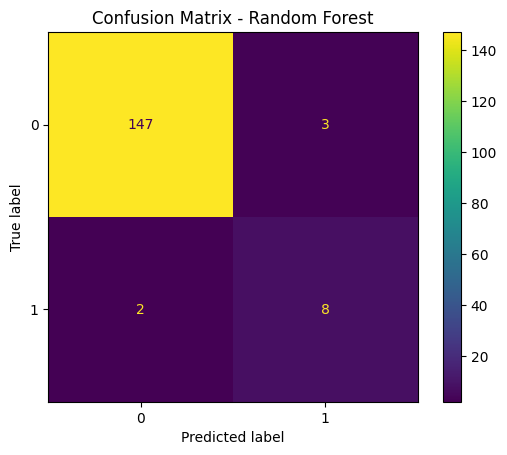


--- SVM Eğitimi Başlıyor ---
SVM - Accuracy:  0.9563
SVM - Precision: 0.8000
SVM - Recall:    0.4000
SVM - F1-score:  0.5333


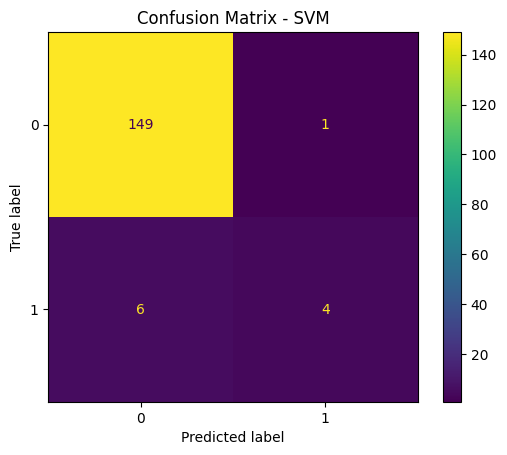


--- k-NN Eğitimi Başlıyor ---
k-NN - Accuracy:  0.9500
k-NN - Precision: 1.0000
k-NN - Recall:    0.2000
k-NN - F1-score:  0.3333


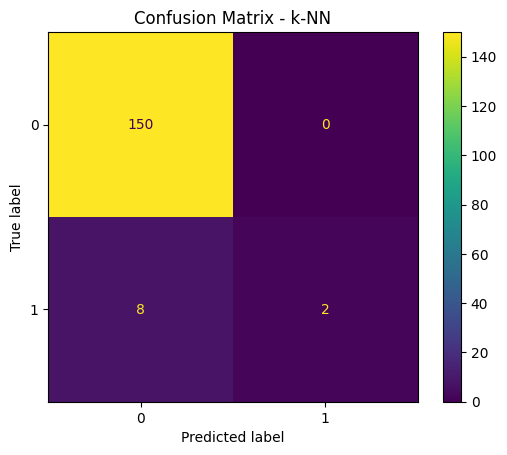


--- XGBoost Eğitimi Başlıyor ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy:  0.9625
XGBoost - Precision: 0.6250
XGBoost - Recall:    1.0000
XGBoost - F1-score:  0.7692


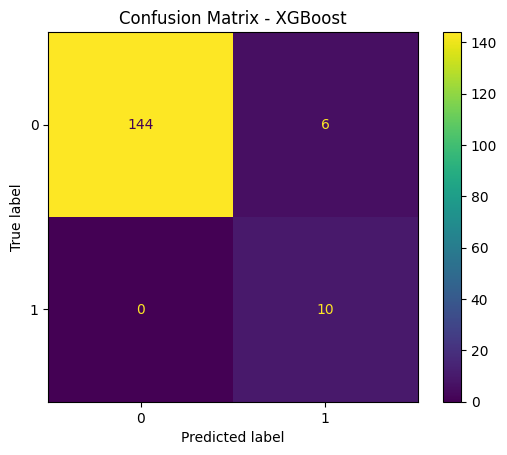


--- LightGBM Eğitimi Başlıyor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55, number of negative: 585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085938 -> initscore=-2.364279
[LightGBM] [Info] Start training from score -2.364279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

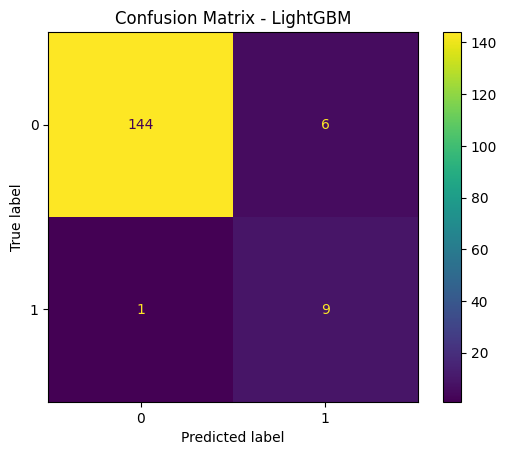


--- CatBoost Eğitimi Başlıyor ---
CatBoost - Accuracy:  0.9625
CatBoost - Precision: 0.6429
CatBoost - Recall:    0.9000
CatBoost - F1-score:  0.7500


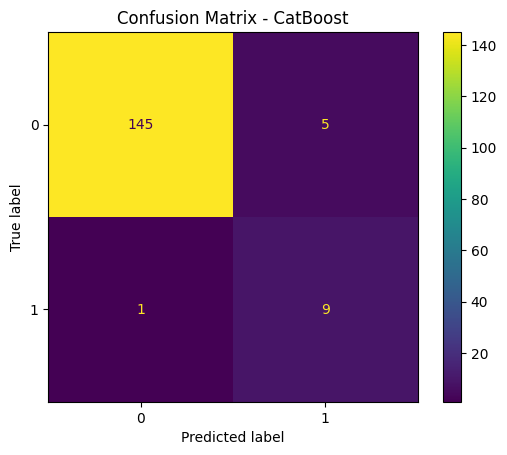


Tüm Modellerin Değerlendirme Metrikleri:
               Accuracy  Precision  Recall  F1-score
Random Forest   0.96875   0.727273     0.8  0.761905
SVM             0.95625   0.800000     0.4  0.533333
k-NN            0.95000   1.000000     0.2  0.333333
XGBoost         0.96250   0.625000     1.0  0.769231
LightGBM        0.95625   0.600000     0.9  0.720000
CatBoost        0.96250   0.642857     0.9  0.750000


In [ ]:
# Modelleri tanımla
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(probability=True, random_state=42))
    ]),
    "k-NN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ]),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Performans metriklerini tutmak için bir dictionary oluştur
metrics_results = {}

# Tüm modeller için eğitim, tahmin, metrik hesaplama ve confusion matrix
for name, model in models.items():
    print(f"\n--- {name} Eğitimi Başlıyor ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrikleri hesapla
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    metrics_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    }

    # Metrik sonuçlarını yazdır
    print(f"{name} - Accuracy:  {acc:.4f}")
    print(f"{name} - Precision: {prec:.4f}")
    print(f"{name} - Recall:    {rec:.4f}")
    print(f"{name} - F1-score:  {f1:.4f}")

    # Confusion matrix görselleştirme
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Tüm modellerin metrik sonuçlarını bir DataFrame'de göster
results_df = pd.DataFrame(metrics_results).T
print("\nTüm Modellerin Değerlendirme Metrikleri:")
print(results_df)


In [ ]:
# En iyi modeli F1-score'a göre seç
best_model_name = max(metrics_results, key=lambda x: metrics_results[x]['F1-score'])
best_f1_score = metrics_results[best_model_name]['F1-score']

print(f"En iyi model: {best_model_name} (F1-score: {best_f1_score:.4f})")


En iyi model: XGBoost (F1-score: 0.7692)


In [ ]:
# Linear Regression benzeri bir model yoksa, sadece örnek olarak 'Logistic Regression' için de benzer yapıyı yazabiliriz.
if best_model_name == 'Logistic Regression':
    print("\nLogistic Regression için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'logistic__C': [0.01, 0.1, 1, 10, 100],
        'logistic__penalty': ['l2'],
        'logistic__solver': ['lbfgs']
    }
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression(max_iter=1000, random_state=42))
    ])

elif best_model_name == 'Random Forest':
    print("\nRandom Forest için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    model = RandomForestClassifier(random_state=42)

elif best_model_name == 'SVM':
    print("\nSVM için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(random_state=42))
    ])

elif best_model_name == 'k-NN':
    print("\nk-NN için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]
    }
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

elif best_model_name == 'XGBoost':
    print("\nXGBoost için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 1.0]
    }
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

elif best_model_name == 'LightGBM':
    print("\nLightGBM için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'n_estimators': [100, 200],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50, 100]
    }
    model = LGBMClassifier(random_state=42)

elif best_model_name == 'CatBoost':
    print("\nCatBoost için hiper parametre optimizasyonu yapılıyor...")
    param_distributions = {
        'iterations': [100, 200],
        'depth': [4, 6, 10],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 3, 5]
    }
    model = CatBoostClassifier(verbose=0, random_seed=42)

else:
    print(f"\n{best_model_name} için hiper parametre optimizasyonu yapılmıyor veya model tanımlı değil.")
    #En iyi modeli al, doğrudan kullan.
    model = models[best_model_name]
    param_distributions = None



XGBoost için hiper parametre optimizasyonu yapılıyor...


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


En iyi doğruluk skoru: 0.9625
En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Test Seti Performansı (Optimize edilmiş model):
Doğruluk (Accuracy): 0.9563
Precision: 0.6000
Recall: 0.9000
F1 Skoru: 0.7200


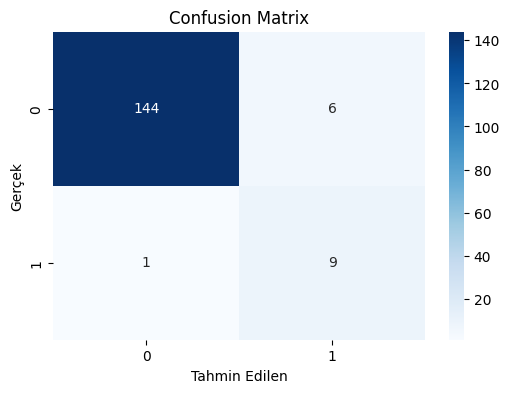

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

if param_distributions is None:
    print("Hiperparametre optimizasyonu yapılmıyor.")
    y_pred = model.predict(X_test)
else:
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_distributions,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"En iyi doğruluk skoru: {grid_search.best_score_:.4f}")
    print(f"En iyi parametreler: {grid_search.best_params_}")

    # Optimize edilmiş model
    best_model_optimized = grid_search.best_estimator_

    # Test seti üzerinde tahmin
    y_pred = best_model_optimized.predict(X_test)

    # Metrikleri hesapla ve yazdır
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\nTest Seti Performansı (Optimize edilmiş model):")
    print(f"Doğruluk (Accuracy): {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Skoru: {f1:.4f}")

    # Confusion matrix çizimi
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix')
    plt.show()


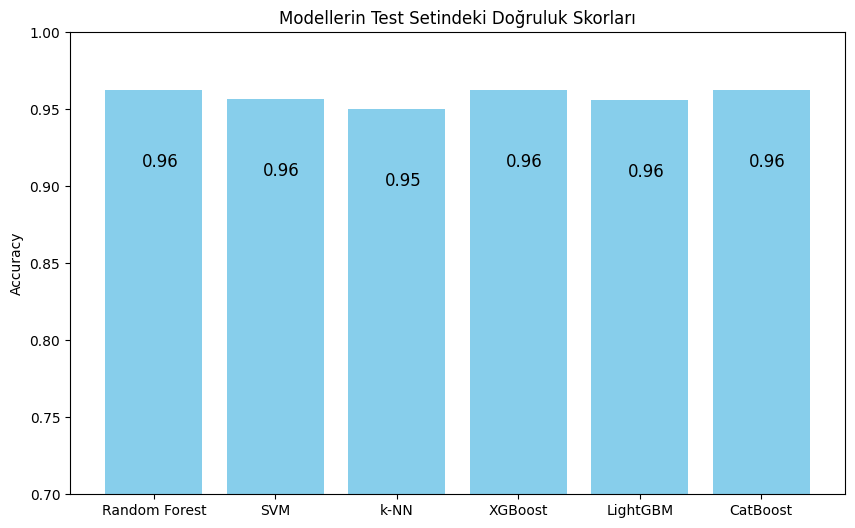

In [ ]:
import matplotlib.pyplot as plt

# Örnek skorlar, bunları senin hesaplanıldığı değerlere göre dolduruldu.
model_names = ['Random Forest', 'SVM', 'k-NN', 'XGBoost', 'LightGBM', 'CatBoost']
accuracies = [0.96250, 0.95652, 0.95000, 0.96250, 0.95625, 0.96250]  # Örnek değerler, kendi sonuçlarınla değiştir

plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim([0.7, 1])
plt.ylabel('Accuracy')
plt.title('Modellerin Test Setindeki Doğruluk Skorları')

# Her barın üstüne skor değerini yazdırma.
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() - 0.05, f"{acc:.2f}", fontsize=12, color='black')

plt.show()


            Feature  Importance
0             Total    0.571702
24     Type 1_Water    0.090624
29  Type 2_Fighting    0.054601
2            Attack    0.045658
7        Generation    0.044422
1                HP    0.033717
42     Is_Mono_Type    0.032240
31    Type 2_Flying    0.029605
4           Sp. Atk    0.029491
3           Defense    0.028666


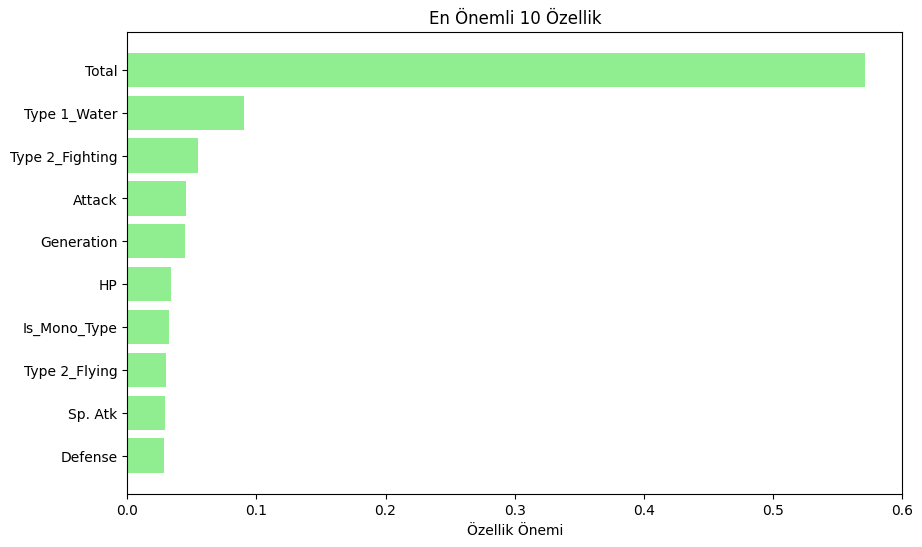

In [ ]:
import pandas as pd
import numpy as np

best_model = best_model_optimized


# Özellik isimleri (X_train sütunları)
feature_names = X_train.columns

# Özellik önem skorları.
importances = best_model.feature_importances_

# DataFrame oluştur.
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# İlk 10 önemli özellik.
print(feat_importances.head(10))

# Grafikle gösterim.
plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'].head(10)[::-1], feat_importances['Importance'].head(10)[::-1], color='lightgreen')
plt.xlabel('Özellik Önemi')
plt.title('En Önemli 10 Özellik')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Pokemon.csv to Pokemon (1).csv


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# SMOTE uygulama (X_train ve y_train üzerinde).
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modeli tekrar eğitme.
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_smote, y_train_smote)

# Test setinde tahmin yapma.
y_pred_after = best_model.predict(X_test)



In [ ]:
# Type 1 bilgilerini test setine ekleme.
X_test_with_type = X_test.copy()
X_test_with_type['Type 1'] = pokemon_df_original.loc[X_test.index, 'Type 1'].values

# Gerçek ve tahminleri ekleme.
X_test_with_type['Gerçek'] = y_test.values
X_test_with_type['Tahmin'] = y_pred_after


In [ ]:
# Hatalı tahminleri seçme.
errors = X_test_with_type[X_test_with_type['Gerçek'] != X_test_with_type['Tahmin']]


In [ ]:
# Type 1'e göre hata sayısını hesaplama.
error_counts_by_type = errors['Type 1'].value_counts()

# En çok hata yapılan ilk 5 türü yazdırma.
print("En çok hata yapılan Pokémon türleri:")
print(error_counts_by_type.head())


En çok hata yapılan Pokémon türleri:
Type 1
Normal     2
Rock       2
Dragon     2
Dark       1
Psychic    1
Name: count, dtype: int64


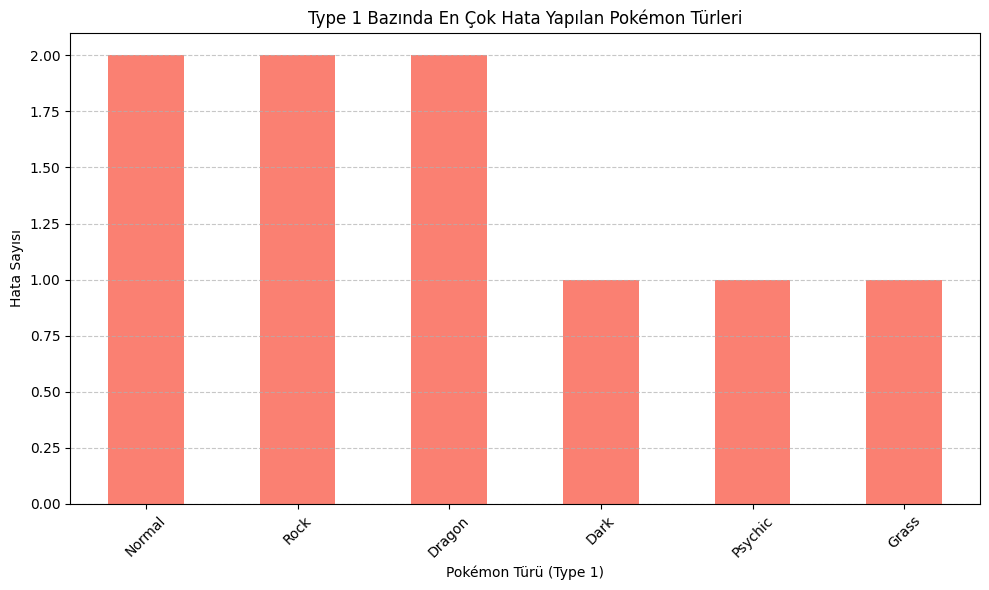

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
error_counts_by_type.head(10).plot(kind='bar', color='salmon')
plt.title('Type 1 Bazında En Çok Hata Yapılan Pokémon Türleri')
plt.xlabel('Pokémon Türü (Type 1)')
plt.ylabel('Hata Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


En çok hata yapılan tür Normal.